In [1]:
import pandas as pd
from scipy.spatial.distance import cdist, pdist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.cluster import KMeans
plt.style.use('ggplot')

In [2]:
## Read data
cabinet = pd.read_csv('../data_public/cabinetWrdMat10.csv', encoding='CP932', na_values='NA')

In [3]:
## Set X 
X = cabinet

In [4]:
## Taking the SVD of X and then calculating the percentage of variance each eigenvector explains
num_vars = 20
U, S, V = np.linalg.svd(X)
eigvals = S**2 / np.cumsum(S)[-1]
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

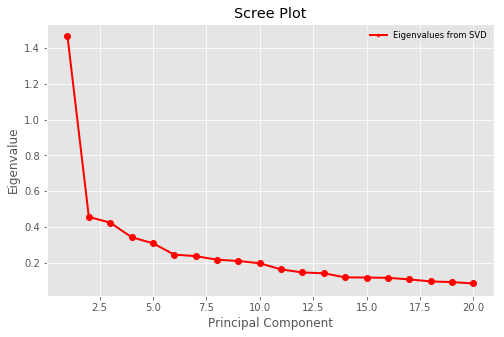

In [5]:
## Plotting the results
plt.plot(sing_vals, eigvals[0:20], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3,
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

It looks like we can reduce *X* downto at most **two** dimensions 

In [6]:
## PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

In [7]:
## K Means
## Using the elbow nethod to determine the number of clusters
cluster = range(1, 21)
score = []
for a in cluster:
    kmeans = KMeans(n_clusters=a, random_state=0)
    ks = -(kmeans.fit(X).score(X))
    score.append(ks)

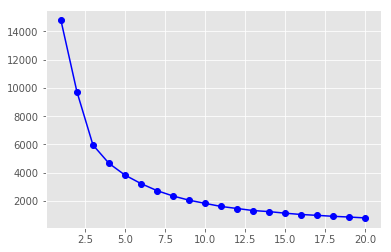

In [8]:
## Plotting the result
plt.plot(cluster, score, 'bo-')
plt.show()

It looks like there are **three** clusters

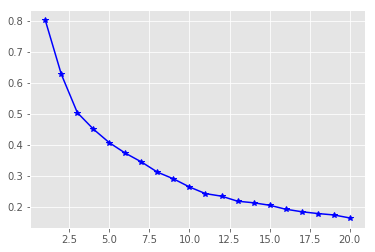

In [46]:
K = range(1,21)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

plt.plot(K, avgWithinSS, 'b*-')
plt.show()

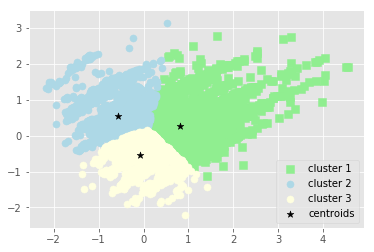

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0)
ypred = kmeans.fit_predict(X)
plt.scatter(X[ypred==0,0],
            X[ypred==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[ypred==1,0],
            X[ypred==1,1],
            s=50,
            c='lightblue',
            marker='o',
            label='cluster 2')
plt.scatter(X[ypred==2,0],
            X[ypred==2,1],
            s=50,
            c='lightyellow',
            marker='o',
            label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=50,
            marker='*',
            c='black',
            label='centroids')
plt.legend()
plt.show()